#  Theoretical Pulsed Squeezing Package
#### This notebook demonstrates all capabilities of the `theoretical_pulsed` package, including generating and visualizing pulsed squeezing, 1D theoretical calculations, and interactive visualizations.

## Importing Classes
1) `TheoreticalPulsedSqueezing`: Core class for simulating pulsed squeezing
2) `TheoreticalPulsed1D`: Simplified 1D theoretical simulations
3) `PulsedSqueezingVisualizer`: Interactive visualization of pulses and squeezing

---

In [1]:
from theoretical_pulsed import TheoreticalPulsedSqueezing, TheoreticalPulsed1D, PulsedSqueezingVisualizer
import numpy as np
import matplotlib.pyplot as plt

### 1. Using `TheoreticalPulsedSqueezing`
This class allows you to define cavity parameters, pump parameters, and compute the squeezing properties of a pulsed light source.

#### Initialization Parameters:
- `pump_power`: Dimensionless number related to the CW threshold (1 means threshold if the pulse is long enough)
- `simulation_time`: Time that the simulation will run for in nanoseconds
- `N_points`: Number of points that will be included in the simulation
- `R_s`: Signal mirror reflectivity [%]
- `R_p`: Pump mirror reflectivity [%]
- `L_s`: Signal intra-cavity loss [%]
- `L_p`: Pump intra-cavity loss [%]
- `tau_cav`: Cavity round-trip time [ns]

In [2]:
sim = TheoreticalPulsedSqueezing(pump_power = 1, simulation_time = 50, N_points = 500, R_s = 94.5, R_p = 73.4, L_s = 0.2, L_p = 0.2, tau_cav = 222e-3)

### 1.1 Pulse Types

#### a) Perfect Square Pulse (Exact Intra-Cavity Solution)
The first implemented and only pulse with an implemented exact solution for the intra-cavity field.

**Attributes:**
- `start_pulse`: Start time of the pulse [ns]  
- `pulse_length`: Duration of the pulse [ns]  

**Method:**
```python
simulate_square_pulse(start_pulse, length_pulse)

In [3]:
sim.simulate_square_pulse(start_pulse = 3, pulse_length=5)

#### b) Generic Square (Trapezoidal) Pulse
A more realistic pulse shape with a finite rise and fall time.

**Attributes:**
- `t_start`: Start time of the pulse [ns]  
- `t_rise`: Time to reach full amplitude [ns]  
- `t_plateau`: Duration of the flat top [ns] 
- `t_fall`: Time to decay to zero [ns]  
- `noise` *(optional)*: Standard deviation of Gaussian noise added to the pulse 

**Method:**
```python
simulate_trapezoid_pulse(start_pulse, length_pulse)

In [4]:
sim.simulate_trapezoid_pulse(t_start=3, t_rise=2, t_plateau=3, t_fall=2, noise = 0.0)

#### c) Gaussian Pulse
A smooth pulse defined by its center and width.

**Attributes:**
- `t_center`: Pulse center [ns] 
- `sigma`: Pulse width (standard deviation) [ns]
- `noise` *(optional)*: Standard deviation of Gaussian noise added to the pulse 

**Method:**
```python
simulate_gaussian_pulse(t_center, sigma, noise)

In [5]:
sim.simulate_gaussian_pulse(t_center=5, sigma = 1, noise = 0)

#### d) Custom Pulse
Allows you to define any pulse shape with an array of values.

**Attributes:**
- `input_pulse`: Numpy array defining the pulse amplitude at each simulation point

**Method:**
```python
simulate_gaussian_pulse(input_pulse)

In [6]:
import numpy as np

t = np.linspace(0, 80, 500)
pulse = ((t >= 3) & (t < 8)) * 1.0 + ((t >= 25) & (t < 30)) * 1.0
sim.simulate_custom_pulse(pulse)

### 1.2 Important Attributes

**Attributes**

- *N*: N-moment matrix (N_points × N_points)  
- *M*: M-moment matrix (N_points × N_points)  
- *eigenvalues*: Eigenvalues of the N-moment matrix (sorted in descending order)  
- *eigenvectors*: Eigenvectors of the N-moment matrix (sorted according to eigenvalues)  
- *first_eigenvector*: Eigenvector corresponding to the largest eigenvalue  
- *purity*: Purity of the quantum state  
- *schmidt*: Schmidt decomposition value of the quantum state  
- *squeezing*: Squeezing values for the first mode  
- *antisqueezing*: Antisqueezing values for the first mode  
- *squeezing_modes*: Squeezing values for all modes (sorted in descending order)  
- *antisqueezing_modes*: Antisqueezing values for all modes (sorted in descending order)


---

### 2. Using `TheoreticalPulsed1D`
This class allows simulating a 1D pulsed squeezing scenario. One of the parameters can be a numpy array (e.g., from `linspace`), and the class will automatically plot the results.

#### Initialization Parameters:
- `pump_power`: Dimensionless number related to the CW threshold (1 means threshold if the pulse is long enough)  
- `simulation_time`: Total simulation time [ns]  
- `N_points`: Number of points in the simulation  
- `R_s`: Signal mirror reflectivity [%] (default: 94.5)  
- `R_p`: Pump mirror reflectivity [%] (default: 73.4)  
- `L_s`: Signal intra-cavity loss [%] (default: 0.2)  
- `L_p`: Pump intra-cavity loss [%] (default: 0.2)  
- `tau_cav`: Cavity round-trip time [ns] (default: 222e-3)  

#### Pulse Parameters
Use `set_pulse_params` to define the pulse shape:

- `t_start`: Pulse start time [ns]  (default: 3)
- `t_rise`: Rise time of the pulse [ns] (default: 0)  
- `t_plateau`: Duration of the plateau [ns] (default: 5)  
- `t_fall`: Fall time of the pulse [ns] (default: 0)


In [7]:
sim = TheoreticalPulsed1D(
    pump_power=1,
    simulation_time=100, 
    N_points=500,
    R_s = 94.5,
    R_p = 73.4,
    L_s = 0.2,
    L_p = 0.2,
    tau_cav = 222e-3
)
sim.set_pulse_params(t_start = 3, t_rise = 0, t_plateau = np.linspace(1,10,10), t_fall = 0)  # sweeping t_plateau

#### Running the Simulation

- `sim.run()`:  
  This method performs the actual simulation of the pulsed squeezing scenario using the parameters defined during initialization and with `set_pulse_params`.  
  *Only one parameter can be swept at a time;* otherwise, an error will occur.  
  After running, the object stores computed attributes such as *squeezing*, *antisqueezing*, and *Schmidt number*.

- `sim.plot()`:  
  This method automatically generates plots of the simulation results for *antisqueezing* and *Schmidt number*.



Sweeping t_plateau: 100%|██████████| 10/10 [00:00<00:00, 33.17it/s]


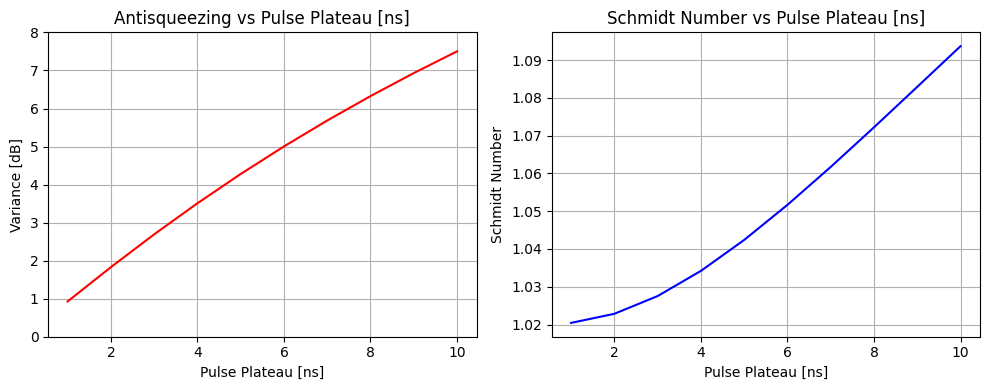

In [8]:
sim.run()
sim.plot()

---

### 3. Using `PulsedSqueezingVisualizer`

This class allows you to interactively explore and visualize the parameters of pulsed squeezing simulations.

#### Initialization Parameters:
- `vis = PulsedSqueezingVisualizer(TheoreticalPulsedSqueezing)`

#### Methods:
- `interact_custom_pulse(t, input_pulse)`  
  Allows defining a fully custom pulse by providing a time array `t` and a corresponding pulse amplitude array `input_pulse`.

- `interact_trapezoidal_pulse()`  
  Opens an interactive interface to create a trapezoidal pulse with adjustable rise, plateau, and fall times.

- `interact_gaussian_pulse()`  
  Opens an interactive interface to create a Gaussian pulse with adjustable center and width.

- `interact_square_pulse()`  
  Opens an interactive interface to create a perfect square pulse with adjustable start time and duration.



In [14]:
vis = PulsedSqueezingVisualizer(TheoreticalPulsedSqueezing)
vis.interact_square_pulse()



interactive(children=(FloatSlider(value=1.0, description='Pump Power', layout=Layout(width='450px'), max=5.0, …